# Lecture 13: standard Normal, Normal normalizing constant

## Proof of the Universality of $Unif(0,1)$

Let $F$ be a _continuous_, _strictly increasing_ CDF.

Then 

\begin{align}
  &X = F^{-1}(U) \sim F & &\text{if } U \sim Unif(0,1) & &\text{(1)}\\
  \\
  &F(X) \sim Unif(0,1) & &\text{if } X \sim F & &\text{(2)}
\end{align}

$F$ is just a function, and hence we can treat it like an operator. 

Also, like $X$, $F(X)$ is just another r.v.

### Interpreting the Universality of $Unif(0,1)$

_How to interpret this universality?_

\begin{align}
  &F(x) = P(X \le x) & &\text{does not imply that } \\
  \\
  \require{cancel} &\bcancel{F(X) = P(X \le X) = 1} \\
  \\
  \\  
  &F(x) = 1 - e^{-x} & &\text{where } x \gt 0 \\
  &F(X) = 1 - e^{-X}
\end{align}

_First_ evaluate $F$ at $x$, and _then_ replace $x$ for $X$. 

### Simulating random variable draws using the universality of $Unif(0,1)$

These 2 approaches to universality of the Uniform are quite useful, like when you want to simulate draws from another r.v.

Let $F(x) = 1 - e^{-x}$, where $x \gt 0$. This is the exponential random distribution $Expo(1)$.

Say we have $U \sim Unif(0,1)$.

_How can we leverage universality of $Unif(0,1)$ to simulate $X \sim F$?_

\begin{align}
  u &= 1 - e^{-x} & &\text{first we obtain }F^{-1}(x) \\
  e^{-x} &= 1 - u \\
  -x &= ln(1 - u)  \\
  x &= - ln(1-u) \\
  \\
  \Rightarrow F^{-1}(u) &= -ln(1-u) \\
  \Rightarrow F^{-1}(U) &= -ln(1-U) \sim F & &\text{by universality}
\end{align}

And so we could simulate 10 i.i.d. draws from $F(x) = 1 - e^{-x}$ by calculating $-ln(1-U)$ 10 times.

### Symmetry of  $Unif(0,1)$

![title](images/L1301.png)

Note that

\begin{align}
  1 - U \sim Unif(0,1) & &\text{symmetry of Uniform} \\
  \\
  a + b U & &\text{linear transformations are also } Unif
\end{align}

Non-linear transformations will, in general, __not__ be $Unif$.

----

## Independence of Random Variables

### General case

Say we have r.v. $X_1, X_2, \dots , X_n$.

> __Definition__ $X_1, X_2, \dots , X_n$ are independent if, for all $x_1, x_2, \dots, x_n$
> 
> \\begin{align}
>   P(X_1 \le x_1, X_2 \le x_2, \dots , X_n \le x_n) &= P(X_1 \le x_1) P(X_2 \le x_2) \cdots P(X_n \le x_n)
> \\end{align}

Note that in this general case, $P(X_1 \le x_1, X_2 \le x_2, \dots , X_n \le x_n)$ is called the __joint CDF__.

### Discrete case

> __Definition__ Discrete r.v. $X_1, X_2, \dots , X_n$ are independent if, for all $x_1, x_2, \dots, x_n$
> 
> \\begin{align}
>   P(X_1 = x_1, X_2 = x_2, \dots , X_n = x_n) &= P(X_1 = x_1) P(X_2 = x_2) \cdots P(X_n = x_n)
> \\end{align}

In the discrete case, $P(X_1 = x_1, X_2 = x_2, \dots , X_n = x_n)$ is called the __joint PMF__.

### Interpretation

Simply put, in both the general and discrete cases, knowing any subset of the r.v. gives us __no__ information about the rest.

This is _stronger_ than pair-wise independence.

#### Ex. A penny-matching game

Consider a penny-matching game where 2 players flip a penny. If the faces showing match (HH or TT), then one of the players wins; else the other player wins.

Let 

\begin{align}
  X_1, X_2 &\sim \mathbb{Bern}\left(\frac{1}{2}\right) ~~ \text{, i.i.d} \\
  \\
  X_3 &=
    \begin{cases}
    1  & \quad \text{if } X_1 = X_2 \\
    0  & \quad \text{otherwise}\\
    \end{cases}
\end{align}
  
$X_1, X_2, X_3$ are _pair-wise independent_, but not independent.

- Knowing $X_1, X_2$ gives us complete knowledge of $X_3$.
- However, just knowing $X_1$ tells us nothing about $X_2$, nor can it say anything about $X_3$.
____

## Normal Distribution (Gaussian)

### Description

The most important distribution in all statistics, mostly due to the Central Limit Theorem.

The Central Limit Theorem is surprising; if you sum up a large number of i.i.d. random variables will always look like a bell-shaped curve. This is irrespective of continuous or discrete; beautiful or ugly.



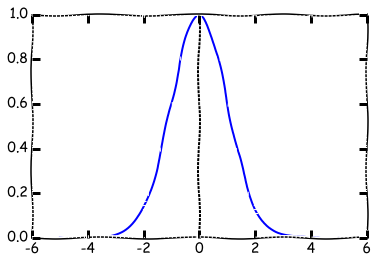

In [23]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.xkcd()

x = np.linspace(-5, 5, 500)
y = np.e ** ((-x**2)/2)

_, ax = plt.subplots()

ax.plot(x, y)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

### Notation

$X \sim \mathcal{N}(\mu, Var)$

### Parameters

- $\mu$ mean
- $Var$ variance

### Probability density function

For the Standard Normal $\mathcal{N}(0,1)$

\begin{align}
  f(z) &= c e^{-\frac{z^{2}}{2}}
\end{align}

Where $c$ is the normalizing constant that will let $f(x)$ integrate to 1. _But what is $c$?_

Consider the integral of the PDF of $\mathcal{N}$.

\begin{align}
  \int_{-\infty}^{\infty} e^{-\frac{z^2}{2}} ~~ dz
\end{align}

There is a theorem that states that this integral, as an indefinite integral, cannot be solved in closed form. But this can be solved...

First, we start by _multiplying the integral by itself_...

\begin{align}
  \int_{-\infty}^{\infty} e^{-\frac{z^2}{2}} ~~ dz \int_{-\infty}^{\infty} e^{-\frac{z^2}{2}} ~~ dz &= \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} ~~ dx \int_{-\infty}^{\infty} e^{-\frac{y^2}{2}} ~~ dy \\
  &= \iint_{-\infty}^{\infty} e^{-\frac{(x+y)^2}{2}} ~~ dxdy \\
  &= \int_{0}^{2\pi} \int_{0}^{\infty} e^{-\frac{r^2}{2}}~ \underbrace{r}_{\text{jacobian}} ~ drd\theta & \quad \text{switch to polar} \\
  &= \int_{0}^{2\pi} \left( \int_{0}^{\infty} e^{-u} du  \right) ~ d\theta & \quad \text{let } u = \frac{r^2}{2} \text{ , } du = r \\
  &= \int_{0}^{2\pi} \left( -e^{-\infty} + e^{-0}  \right) ~ d\theta \\
  &= \int_{0}^{2\pi} 1 ~ d\theta \\
  &= 2 \pi - 0 \\
  &= 2\pi \\
  \\
  \int_{-\infty}^{\infty} e^{-\frac{z^2}{2}} ~~ dz &= \sqrt{2\pi} \\
  \\
  \therefore c &= \boxed{\frac{1}{\sqrt{2\pi}} }
\end{align}


### Expected value

For the standard normal distribution, $\mathbb{E}(Z) = 0$. Let's prove that...

\begin{align}
  \mathbb{E}(Z) &= \int_{-\infty}^{\infty} z ~ \frac{e^{-\frac{z^2}{2}}}{\sqrt{2\pi}} ~ dz \\
  &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} z ~ e^{-\frac{z^2}{2}} ~ dz \\
  &= \frac{1}{\sqrt{2\pi}} (0) & \quad \text{since this is an odd function} \\
  &= 0 & \quad \blacksquare
\end{align}

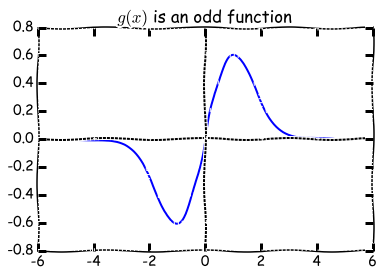

In [36]:
x = np.linspace(-5, 5, 500)
y = x * (np.e ** ((-x**2)/2))

_, ax = plt.subplots()
ax.plot(x, y)
#ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("$g(x)$ is an odd function")
plt.show()

Recall that if $g(x)$ is an _odd function_, then $g(x) + g(-x) = 0$. 

Integrating an odd function $g(x)$ from $-a$ to $a$ is 0, since the portion _above the x-axis_ cancels out the portion _below the x-axis_.

### Variance

For the standard normal distribution, $\mathbb{Var}(Z) = 1$. Let's prove this as well...

\begin{align}
  \mathbb{Var}(Z) &= \mathbb{E}Z^2 - \mathbb{E}(Z)^2 \\
  &= \int_{-\infty}^{\infty} z^2 ~ \frac{e^{-\frac{z^2}{2}}}{\sqrt{2\pi}} ~ dz - (0)^2 & \quad \text{by LOTUS; and by calculations above} \\=
  &= 2 \int_{0}^{\infty} z^2 ~ \frac{e^{-\frac{z^2}{2}}}{\sqrt{2\pi}} ~ dz & \quad \text{this is an even function} \\
  &= \frac{2}{\sqrt{2\pi}} \int_{0}^{\infty} z^2 ~ e^{-\frac{z^2}{2}} ~ dz & \quad \text{set us up for integration by parts} \\
  &= \frac{2}{\sqrt{2\pi}} \int_{0}^{\infty} z ~ z ~ e^{-\frac{z^2}{2}} ~ dz  \\
  &= \frac{2}{\sqrt{2\pi}} \int_{0}^{\infty} u ~ du ~ dv & \quad \text{let } u = z \text{, } \quad dv = z ~ e^{-\frac{z^2}{2}} \\
  & & \quad du = dz \text{, } \quad v = -e^{-\frac{z^2}{2}} \\
  &= \frac{2}{\sqrt{2\pi}} \left( \left.(uv)\right\vert_{0}^{\infty} - \int_{0}^{\infty} v du   \right) \\
  &= \frac{2}{\sqrt{2\pi}} \left( 0 + \int_{0}^{\infty} e^{-\frac{z^2}{2}} ~ dz  \right) \\
  &= \frac{2}{\sqrt{2\pi}} \left( \frac{\sqrt{2\pi}}{2} \right) & \quad \text{from calculation of normalization constant }c \\
  &= 1 & \quad \blacksquare
\end{align}

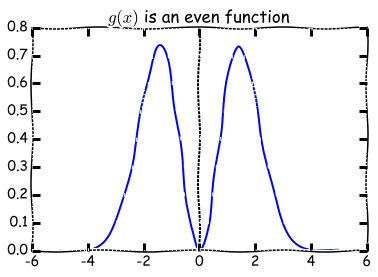

In [39]:
x = np.linspace(-5, 5, 500)
y = (x**2) * (np.e ** ((-x**2)/2))

_, ax = plt.subplots()
ax.plot(x, y)
#ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("$g(x)$ is an even function")
plt.show()

## Standard Normal Distribution

This standard normal distribution is so important that it has its own name and notation.

### Notation

The standard normal distribution is notated by $\mathbb{\Phi}(Z)$

### Cumulative distribution function

The cumulative distribution function of $\Phi(Z)$ is

\begin{align}
  \mathbb{\Phi}(Z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-\frac{t^2}{2}} ~ dt
\end{align}

### Property of $\Phi(-Z)$

\begin{align}
  \mathbb{\Phi}(-Z) = 1 - \mathbb{\Phi}(Z)
\end{align}

----